In [10]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [11]:
#Import all the required libraries:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit import Aer, QuantumCircuit, execute, ClassicalRegister, QuantumRegister, BasicAer
#Initialise the Aer Backend
backend = Aer.get_backend('qasm_simulator')

In [12]:
qbit = QuantumRegister(1,'q')
cbit = ClassicalRegister(1,'c')
circuit = QuantumCircuit(qbit,cbit)

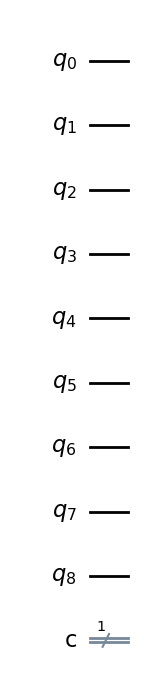

In [13]:
#Shor's 9 qubit code:
qbit = QuantumRegister(9,'q')
cbit = ClassicalRegister(1,'c')
circuit = QuantumCircuit(qbit,cbit)
circuit.draw('mpl')

In [14]:
circuit.cx(qbit[0],qbit[3])
circuit.cx(qbit[0],qbit[6])

circuit.h(qbit[0])
circuit.h(qbit[3])
circuit.h(qbit[6])

circuit.cx(qbit[0],qbit[1])
circuit.cx(qbit[3],qbit[4])
circuit.cx(qbit[6],qbit[7])

circuit.cx(qbit[0],qbit[2])
circuit.cx(qbit[3],qbit[5])
circuit.cx(qbit[6],qbit[8])

In [15]:
#Adding Not gate for bit flip error and Z gate for phase flip error:
circuit.x(qbit[0])
circuit.z(qbit[0])

Job Status: job has successfully run
{'0': 1000}


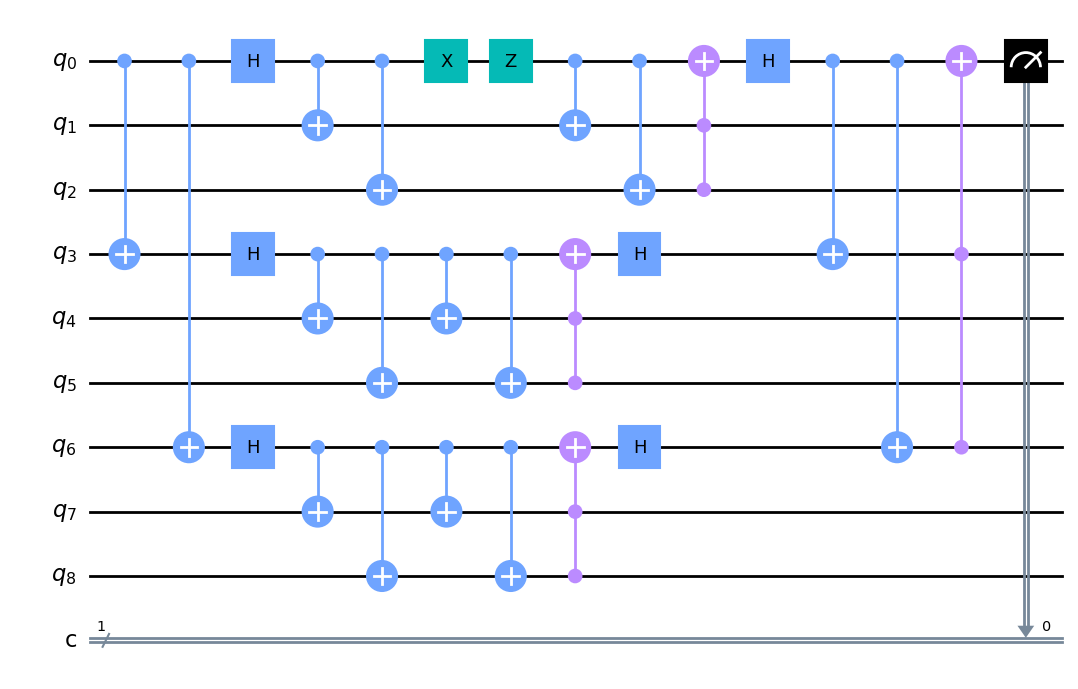

In [16]:
circuit.cx(qbit[0],qbit[1])
circuit.cx(qbit[3],qbit[4])
circuit.cx(qbit[6],qbit[7])

circuit.cx(qbit[0],qbit[2])
circuit.cx(qbit[3],qbit[5])
circuit.cx(qbit[6],qbit[8])

circuit.ccx(qbit[1],qbit[2],qbit[0])
circuit.ccx(qbit[4],qbit[5],qbit[3])
circuit.ccx(qbit[8],qbit[7],qbit[6])

circuit.h(qbit[0])
circuit.h(qbit[3])
circuit.h(qbit[6])

circuit.cx(qbit[0],qbit[3])
circuit.cx(qbit[0],qbit[6])
circuit.ccx(qbit[6],qbit[3],qbit[0])

circuit.measure(qbit[0],cbit[0])
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print(counts)
circuit.draw('mpl')